Challenge Set 6
Topic:        Classification Errors
Date:         08/01/2016
Name:         Matthew Mitchell
Worked with:  Whitney

In [1]:
from IPython.display import Image
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

##Challenge 1

In [2]:
ls

05_Classification/
06_Classification_Errors/
House_Decision_Tree.dot
Luther/
Mitchell_Challenge6_ClassificationErrors.ipynb
Mitchell_Challenge7_SQL.ipynb
Mitchell_Challenge8.ipynb
Titanic_Kaggle/
house-votes-84.data


In [3]:
house_df = pd.read_csv('house-votes-84.data', header=None)

In [4]:
house_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y,republican.
1,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?,republican.
2,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n,democrat.
3,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y,democrat.
4,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y,democrat.


In [9]:
house_df = house_df.replace('republican.', 0)
house_df = house_df.replace('democrat.', 1)
house_df = house_df.replace('y',1)
house_df = house_df.replace('n', 0)
house_df = house_df.replace('?', np.nan)
house_df = house_df.fillna(house_df.mean())
house_df.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.00000,1,0,1.000000,1.000000,1,0,0,0.000000,1,0.362319,1.000000,1.000000,1.000000,0.000000,1.000000,0
1,0.00000,1,0,1.000000,1.000000,1,0,0,0.000000,0,0.000000,1.000000,1.000000,1.000000,0.000000,0.812689,0
2,0.44208,1,1,0.417453,1.000000,1,0,0,0.000000,0,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1
3,0.00000,1,1,0.000000,0.504762,1,0,0,0.000000,0,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1
4,1.00000,1,1,0.000000,1.000000,1,0,0,0.000000,0,1.000000,0.423267,1.000000,1.000000,1.000000,1.000000,1
5,0.00000,1,1,0.000000,1.000000,1,0,0,0.000000,0,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1
6,0.00000,1,0,1.000000,1.000000,1,0,0,0.000000,0,0.000000,0.000000,0.509756,1.000000,1.000000,1.000000,1
7,0.00000,1,0,1.000000,1.000000,1,0,0,0.000000,0,0.000000,0.000000,1.000000,1.000000,0.427518,1.000000,0
8,0.00000,1,0,1.000000,1.000000,1,0,0,0.000000,0,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0
9,1.00000,1,1,0.000000,0.000000,0,1,1,1.000000,0,0.000000,0.000000,0.000000,0.000000,0.427518,0.812689,1


In [10]:
from sklearn.cross_validation import train_test_split

In [62]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [63]:
y_pred = clf.predict(X_test)

In [64]:
from sklearn.externals.six import StringIO

In [65]:
with open("House_Decision_Tree.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

In [53]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

In [54]:
import pydot
import pydotplus

In [66]:
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("House_Tree.pdf") 

True

In [67]:
ls

2013_movies.csv          data.txt                 ships.dta
House_Decision_Tree.dot  haberman.data            titanic_train.csv
House_Tree.pdf           house-votes-84.data


In [68]:
type(graph)

pydotplus.graphviz.Dot

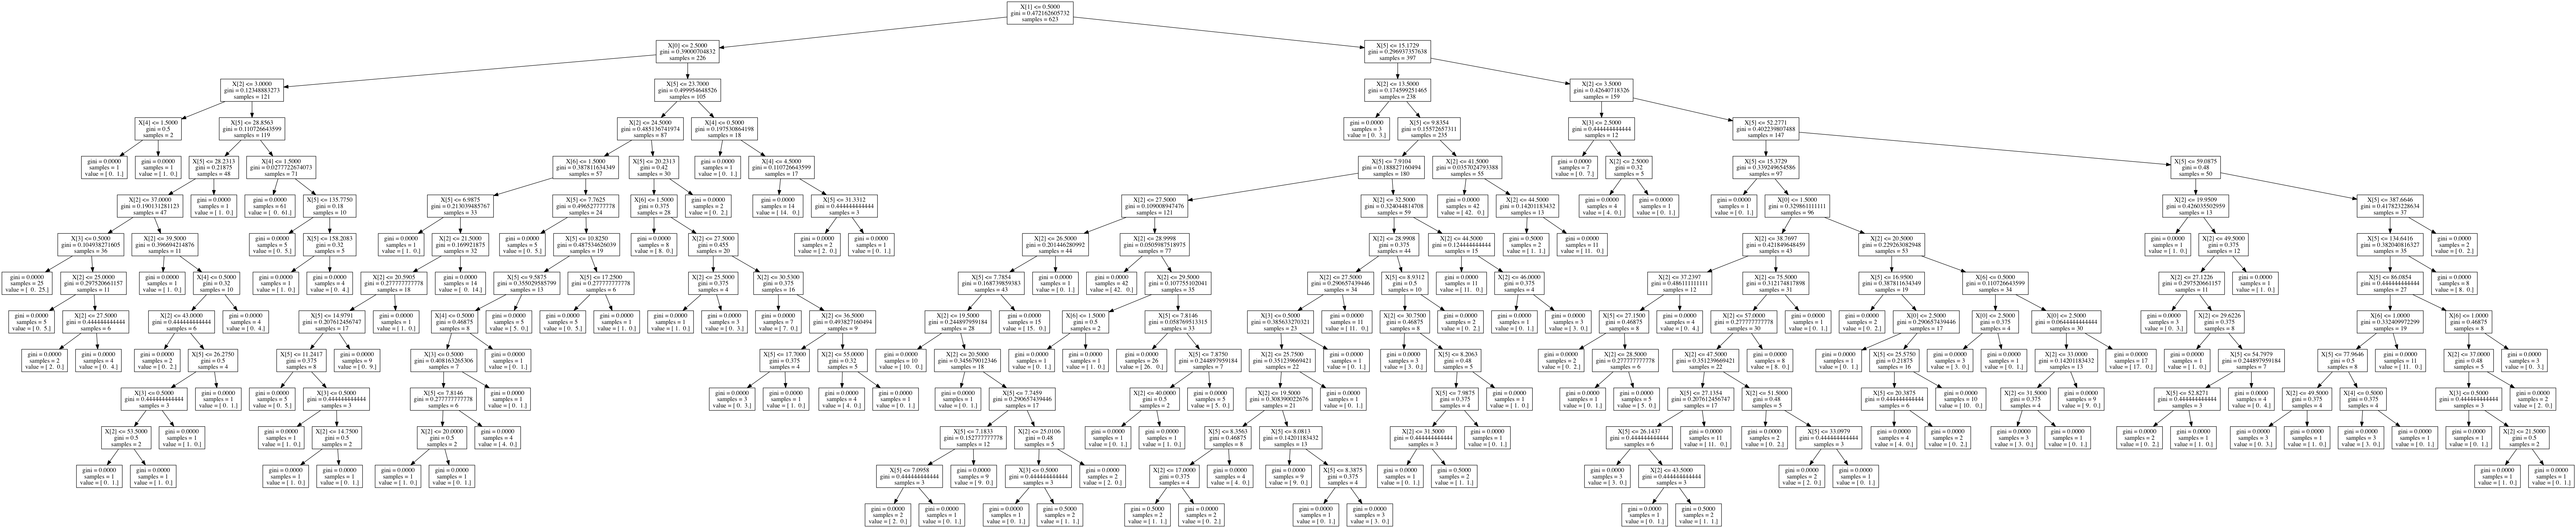

In [262]:
from IPython.display import Image  
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

##Challenge 2

In [44]:
cd challenges_data/

/Users/matthewmitchell/Desktop/Metis/Challenges/challenges_data


In [46]:
ls

2013_movies.csv      haberman.data        ships.dta
data.txt             house-votes-84.data  titanic_train.csv


In [47]:
movies = pd.read_csv('2013_movies.csv')
movies.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [77]:
has_budget = movies[~movies.Budget.isnull()==True]

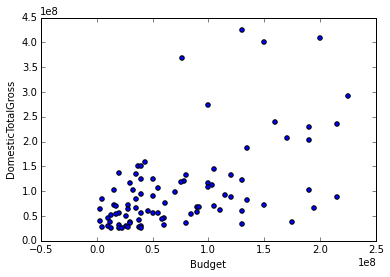

In [78]:
has_budget.plot('Budget','DomesticTotalGross',kind='scatter')

In [79]:
movies[movies.Budget.isnull()==True]

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
6,Monsters University,NaN,268492764,Dan Scanlon,G,107,2013-06-21 00:00:00
7,The Hobbit: The Desolation of Smaug,NaN,258366855,Peter Jackson,PG-13,161,2013-12-13 00:00:00
66,Tyler Perry's A Madea Christmas,NaN,52543354,Tyler Perry,PG-13,105,2013-12-13 00:00:00
67,Tyler Perry's Temptation: Confessions of a Mar...,NaN,51975354,Tyler Perry,PG-13,111,2013-03-29 00:00:00
73,Instructions Not Included,NaN,44467206,NaN,PG-13,115,2013-08-30 00:00:00
74,Snitch,NaN,42930462,Ric Roman Waugh,PG-13,112,2013-02-22 00:00:00
78,August: Osage County,NaN,37738810,John Wells,R,130,2013-12-27 00:00:00
83,Texas Chainsaw 3D,NaN,34341945,John Luessenhop,R,92,2013-01-04 00:00:00
85,Blue Jasmine,NaN,33405481,Woody Allen,PG-13,98,2013-07-26 00:00:00
86,Kevin Hart: Let Me Explain,NaN,32244051,NaN,R,75,2013-07-03 00:00:00


In [80]:
movies = movies.fillna(movies.mean())

In [81]:
movies[movies.Budget.isnull()==True]

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate


In [82]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 7 columns):
Title                 100 non-null object
Budget                100 non-null float64
DomesticTotalGross    100 non-null int64
Director              96 non-null object
Rating                100 non-null object
Runtime               100 non-null int64
ReleaseDate           100 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 6.2+ KB


In [86]:
X = movies[['Budget','DomesticTotalGross','Runtime']]
Y = movies.Rating

In [87]:
clf = clf.fit(X, Y)

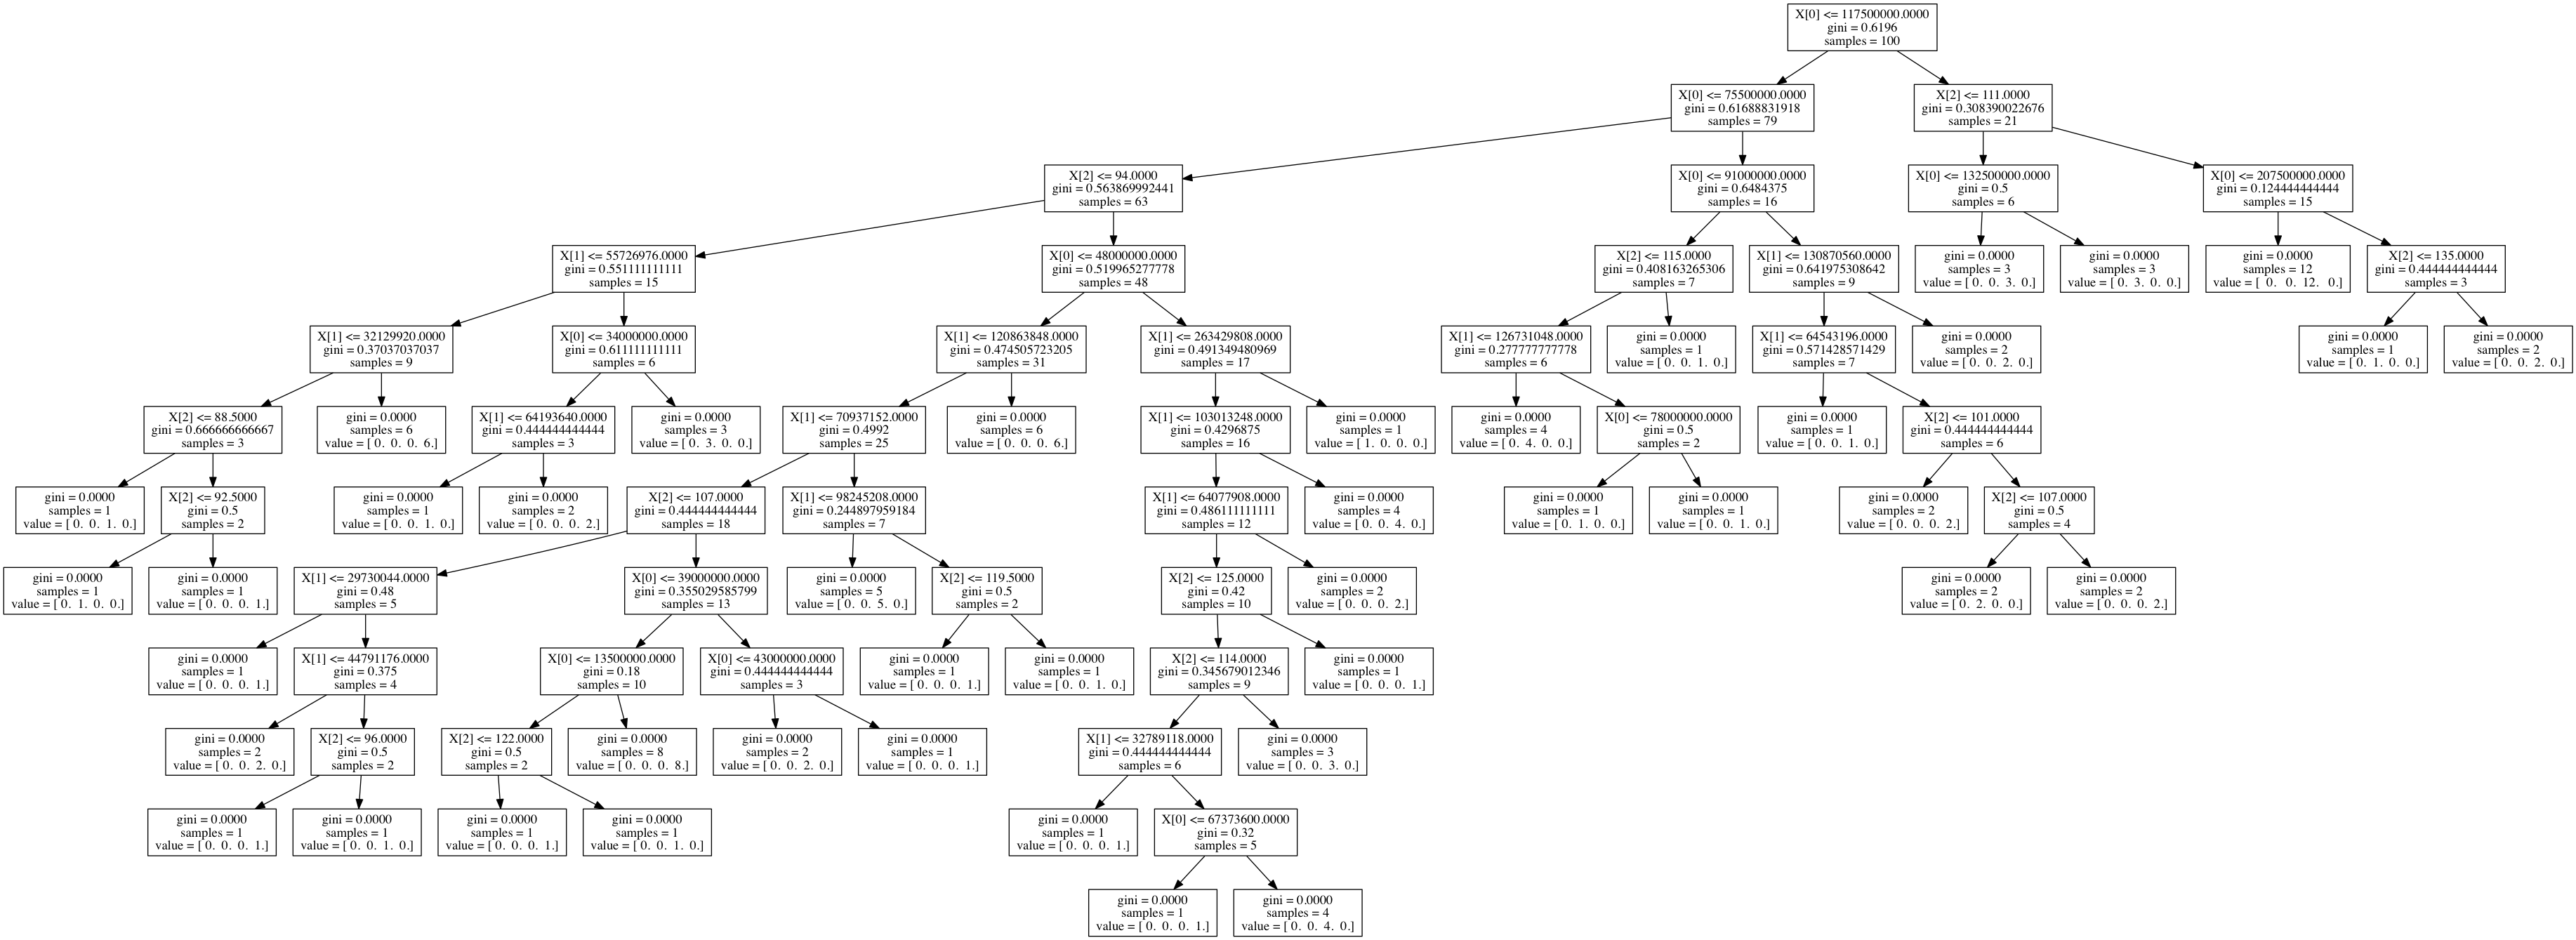

In [91]:
from IPython.display import Image  
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [92]:
tree.export_graphviz?

##Challenge 3! 

In [95]:
titanic = pd.read_csv('titanic_train.csv')

In [150]:
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,0
2,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,2
4,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,2


In [123]:
titanic.sex = titanic.sex.replace('female','0')
titanic.sex = titanic.sex.replace('male','1')
titanic.embarked = titanic.embarked.replace('C','0')
titanic.embarked = titanic.embarked.replace('Q','1')
titanic.embarked = titanic.embarked.replace('S','2')

In [124]:
Y = titanic.survived
X = titanic[['pclass','sex','age','sibsp','parch','fare','embarked']]

In [187]:
no_age = titanic[titanic.age.isnull()==True]
has_age = titanic[titanic.age.isnull()==False]

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=4444)

In [267]:
impute_age_X = has_age[['pclass','sex','sibsp','parch','fare']]
impute_age_Y = has_age['age']

In [268]:
X_age_train, X_age_test, y_age_train, y_age_test = train_test_split(impute_age_X, impute_age_Y, test_size=0.15, random_state=4234)

In [269]:
from sklearn.linear_model import LinearRegression

In [270]:
ols = LinearRegression()
ols.fit(X_age_train, y_age_train)
y_age_predict = ols.predict(X_age_train)
ols.score(X_age_train, y_age_train)

In [275]:
imputed_ages = ols.predict(no_age[['pclass','sex','sibsp','parch','fare']])

In [276]:
no_age.age = imputed_ages

In [210]:
titanic[titanic.age.isnull()==True].age = imputed_ages

In [281]:
titanic_w_age.age[titanic_w_age['age'] <0] = 10

/Users/matthewmitchell/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [386]:
titanic_w_age['embarked'][titanic_w_age.embarked.isnull()] = 1

/Users/matthewmitchell/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


##Missing Ages Have Now Been Imputed.

##Try creating a new feature...

In [430]:
titanic_w_age['classfare']=(titanic_w_age.fare*titanic_w_age.pclass)**0.5
titanic_w_age.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,classfare
0,0,3,"Moran, Mr. James",1,28.052902,0,0,330877,8.4583,NaN,1,5.037350
1,1,2,"Williams, Mr. Charles Eugene",1,35.109688,0,0,244373,13.0000,NaN,2,5.099020
2,1,3,"Masselmani, Mrs. Fatima",0,25.279927,0,0,2649,7.2250,NaN,0,4.655642
3,0,3,"Emir, Mr. Farred Chehab",1,28.075038,0,0,2631,7.2250,NaN,0,4.655642
4,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",0,25.268185,0,0,330959,7.8792,NaN,1,4.861851


In [443]:
Y = titanic_w_age.survived
X = titanic_w_age[['pclass','sex','age','sibsp','parch','fare','embarked','classfare']]

In [447]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=4404)

In [448]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [449]:
clf.score(X_test, y_test)

0.7649253731343284

##Clean and Impute the Test Dataset

In [395]:
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [396]:
test_df.Sex = test_df.Sex.replace('female','0')
test_df.Sex = test_df.Sex.replace('male','1')
test_df.Embarked = test_df.Embarked.replace('C','0')
test_df.Embarked = test_df.Embarked.replace('Q','1')
test_df.Embarked = test_df.Embarked.replace('S','2')

In [480]:
test_df['classfare']=(test_df.Fare*test_df.Pclass)**0.5

In [481]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,classfare
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1,0,4.846401
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2,0,4.582576
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1,0,4.401704
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2,0,5.097794
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2,1,6.071450


In [483]:
X_age_test = test_df[test_df.Age.isnull()][['Pclass','Sex','SibSp','Parch','Fare']]
test_df.Age[test_df.Age.isnull()] = ols.predict(X_age_test)

/Users/matthewmitchell/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [479]:
test_df['Fare'][test_df.classfare.isnull()]=8

/Users/matthewmitchell/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [484]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Survived         0
classfare        0
dtype: int64

In [489]:
clf.score(X_test, y_test)

0.7649253731343284

In [485]:
X_test_final = test_df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','classfare']]
Final_Predictions = clf.predict(X_test_final)

In [486]:
test_df['Survived']=Final_Predictions

In [487]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,classfare
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1,0,4.846401
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2,0,4.582576
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1,1,4.401704
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2,0,5.097794
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2,0,6.071450


In [345]:
submission_df = test_df[['PassengerId','Survived']]

In [346]:
submission_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,1
4,896,0


In [347]:
pwd

u'/Users/matthewmitchell/Desktop/Metis/Challenges/Titanic_Kaggle'

In [348]:
submission_df.to_csv('Mitchell_Titanic_Kaggle_Submission1.csv', index=False)

In [352]:
from sklearn.ensemble import GradientBoostingClassifier

In [490]:
GBC = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000)

In [491]:
GBC.fit(X_train,y_train)

GradientBoostingClassifier(init=None, learning_rate=0.01, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [492]:
GBC.score(X_test, y_test)

0.83582089552238803

In [493]:
new_predictions = GBC.predict(X_test_final)

In [494]:
test_df['Survived']=new_predictions

In [495]:
submission_df = test_df[['PassengerId','Survived']]

In [496]:
submission_df.to_csv('Mitchell_Titanic_Kaggle_Submission4.csv', index=False)

In [361]:
from sklearn.svm import LinearSVC

In [497]:
svc = LinearSVC()

In [498]:
svc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [499]:
svc.score(X_test, y_test)

0.68656716417910446

In [401]:
predictions3_svc = svc.predict(X_test_final)

In [402]:
test_df['Survived']=predictions3_svc

In [403]:
submission_df = test_df[['PassengerId','Survived']]
submission_df.to_csv('Mitchell_Titanic_Kaggle_Submission3.csv', index=False)

In [367]:
svc.get_params

<bound method LinearSVC.get_params of LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)>

In [369]:
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV

In [370]:
RandomizedSearchCV(GBC, , n_iter=1000)

TypeError: __init__() takes at least 3 arguments (3 given)

In [504]:
from sklearn import cross_validation
from sklearn.metrics import roc_auc_score

In [372]:
cross_validation?

In [509]:
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,
                                                               min_samples_leaf=50,max_depth=8,max_features='sqrt',
                                                               subsample=0.8,random_state=10), param_grid = param_test1,
                        n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=8, max_features='sqrt', max_leaf_nodes=None,
              min_samples_leaf=50, min_samples_split=500,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              random_state=10, subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, loss_func=None, n_jobs=4,
       param_grid={'n_estimators': [20, 30, 40, 50, 60, 70, 80]},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

In [510]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.60996, std: 0.00240, params: {'n_estimators': 20},
  mean: 0.60996, std: 0.00240, params: {'n_estimators': 30},
  mean: 0.60996, std: 0.00240, params: {'n_estimators': 40},
  mean: 0.60996, std: 0.00240, params: {'n_estimators': 50},
  mean: 0.60996, std: 0.00240, params: {'n_estimators': 60},
  mean: 0.60996, std: 0.00240, params: {'n_estimators': 70},
  mean: 0.60996, std: 0.00240, params: {'n_estimators': 80}],
 {'n_estimators': 20},
 0.60996129032258062)